In [1]:
using Plots; pyplot();
push!(LOAD_PATH,"/home/theo/OMGP/src")
using OMGP;
using OMGP.KernelFunctions
using GradDescent;

In [2]:
X = readdlm("data/banana_X_train");
Y = readdlm("data/banana_Y_train")[:];

In [ ]:
# Run sparse classification with increasing number of inducing points
models = []
Ms = [4, 8, 16, 32, 64]
for (index, num_inducing) in enumerate(Ms)
    m = SparseXGPC(X, Y, Kernels=[Kernel("rbf",1.0,params=0.5)], BatchSize=10,
               optimizer=Adam(α=0.1),OptimizeIndPoints=false,Stochastic=false,Autotuning=false,m=num_inducing)
    m.train(iterations=200)
    println("Trained with $(num_inducing) points")
    push!(models,m)
end
mfull = BatchXGPC(X, Y, Kernels=[Kernel("rbf",1.0,params=0.5)],
               optimizer=Adam(α=0.1),Autotuning=false)
#mfull.train(iterations=5)

Trained with 4 points
Trained with 8 points
Trained with 16 points


In [ ]:
function compute_Grid(model,nGrid=50)
    mins = [-3.25,-2.85]
    maxs = [3.65,3.4]
    xlin = linspace(mins[1],maxs[1],nGrid)
    ylin = linspace(mins[2],maxs[2],nGrid)
    xplot = reshape(xlin, 1, nGrid)
    yplot = reshape(ylin, nGrid, 1)
    Xplot = hcat(repmat(xplot, nGrid, 1)[:], repmat(yplot, 1, nGrid)[:])
    y = model.predictproba(Xplot)
    return (y,xlin,ylin)
    end;

In [ ]:
function plotdata(X,Y)
    plot(X[Y.==1,1],X[Y.==1,2],t=:scatter,alpha=0.33,lab="",size=(300,500));
    plot!(X[Y.==-1,1],X[Y.==-1,2],t=:scatter,alpha=0.33,lab="")
    end;

In [ ]:
function plotcontour(model,X,Y)
    (predic,x,y) = compute_Grid(model);
    plotdata(X,Y)
    plot!(model.inducingPoints[:,1],model.inducingPoints[:,2],msize=2.0,color="black",t=:scatter,lab="",title=(in(fieldnames(model,:m))?"M = $(model.m)":"full"))
    return plot!(x,y,(x,y)->(model.predictproba([x,y]')[1]),cbar=false,t=:contour,levels=[0.5],fill=false,fillalpha=0.2)
    end


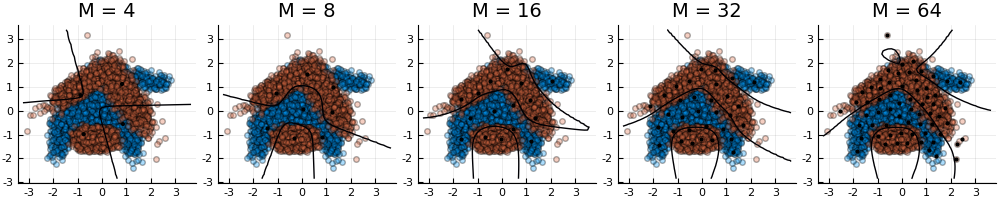

In [103]:
plot(broadcast(x->plotcontour(x,X,Y),models)...,layout=(1,length(Ms)),size=(1000,200))